In [14]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')

### Questão 1)  
---
 $\boxed{\dfrac{\partial ^2 u}{dt^2} = c^2 \dfrac{\partial ^2 u}{dx^2}}$ 
 
 Utilize o método de **Staggered Leap Frog** para resolver a equação de onda unidimensional assumindo como condição inicial uma onda senoidal, isto é:  

$u(x, t=0) = A sin(kx)$  

com $k = \dfrac{n\pi}{L}$ sendo $L$ o comprimento do sistema e $n$ um número inteiro. Explicite as considerações feitas e o conjunto de parâmetros utilizados. Apresente resultados para o perfil da onda y(x, t) e para o perfil de velocidades $v_y = \dfrac{\partial y(x, t)}{\partial t}$


---
$ \text{Os modos que estamos avaliando é}$ $n\pi x / L$

$t = 0$ -> FTCS ;  
$t = 1$ -> Staggered Leap Frog  


$\text{O Staggered Leap Frog a se resolver, na forma de equação de onde é:}$

$\dfrac{u_{j}^{n+1} - 2 u_j^n + u_j^{n-1} }{(\Delta t)^2}$ = $v^2 \dfrac{u_{j+1}^{n} -2u_j^n + u_{j-1}^n}{(\Delta x)^2}$  

$\text{isolando}$ $u_j^{n+1}$ $\text{:}$  

$\boxed{u_j^{n+1} = \dfrac{(\Delta t)^2 v^2}{(\Delta x)^2} (u_{j+1}^n - u_{j-1}^n - 2u_j^n) + 2u_j^n - u_j^{n-1}}$.  

$\text{Na estabilidade da condição de Courant}$, $v\Delta t \le \Delta x$. $\text{Faremos nesse caso}$ $v\Delta t = \Delta x$



In [15]:
#  Parametros Condicao Inicial u(x,0) = A sin(kx) k = n pi / L
A = 1 # amplitude
n = 1 # modo (nós)
L = 1

In [16]:
#  Parametros Condicao Inicial u(x,0) = A sin(kx) k = n pi / L
A = 1 # amplitude
n = 1 # modo (nós)
L = 1
# Tempo 
Nt = 1_000
dt = 0.001 # 0.001
# Espaço
x = np.linspace(0, 1, 1_000)
Nx = 1000
dx = x[1] - x[0]
# Criterio de Courant
v = dx / dt # estabilidade
v*dt == dx

True

In [17]:
u = np.zeros((Nx, Nt + 1)).T
print(f"Tamanho de u: {len(u)}\nTamanho de u(x,0): {len(u[0])}\nTipo de u(x,0): {type(u[0])}")

Tamanho de u: 1001
Tamanho de u(x,0): 1000
Tipo de u(x,0): <class 'numpy.ndarray'>


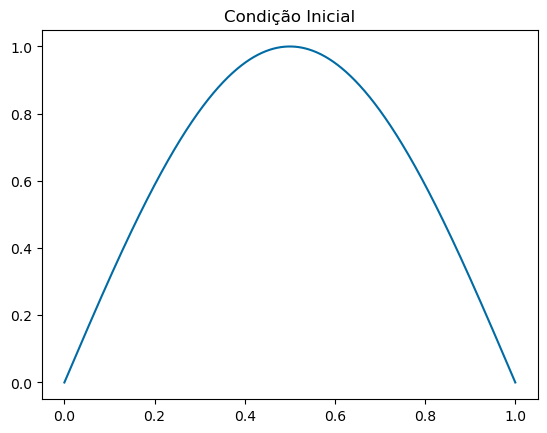

In [18]:
# Condição Inicial
plt.title("Condição Inicial")

u[0] = A * np.sin(n* np.pi * x / L) 
u[1] = A * np.sin(n* np.pi * x / L) # clonar a condição inicial

plt.plot(x, u[0]); ### y(x, t=0)

$\text{Staggered Leap Frog:}$


$\boxed{u_j^{n+1} =  (u_{j+1}^n - u_{j-1}^n - 2u_j^n) + 2u_j^n - u_j^{n-1}}$.



In [19]:
def StagLeapFrog(u: np.ndarray, dx, dt) -> np.ndarray:
    Nx = len(u[0])
    Nt = len(u)
    for n in range(1, Nt-1):
        for j in range(1, Nx-1): # passo 1 ja foi 
            u[n+1][j] = u[n][j+1] + u[n][j-1] - u[n-1][j]      
    return u

In [20]:
u_time = StagLeapFrog(u, dx, dt)

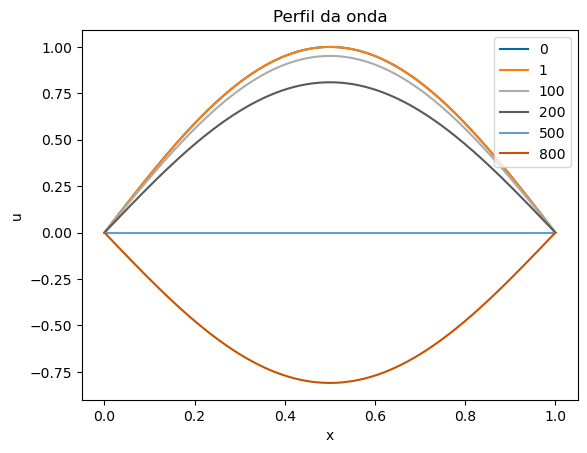

In [29]:
index = [0, 1, 100, 200, 500, 800]

for i in index:
    plt.plot(x, u_time[i], label=f'{i}')
    plt.title("Perfil da onda")
    plt.xlabel('x')
    plt.ylabel('u')
    plt.legend(loc='upper right')

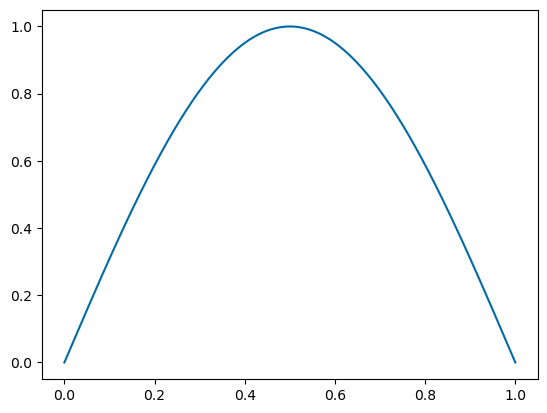

In [22]:
plt.plot(x, u_time[0])



In [39]:
u_time.shape

(1001, 1000)

In [42]:
def derivative(u):
    v = []
    dt = 0.001
    for k in range(len(u)):
        v.append(np.diff(u[k]) / dt)
    return v:
    

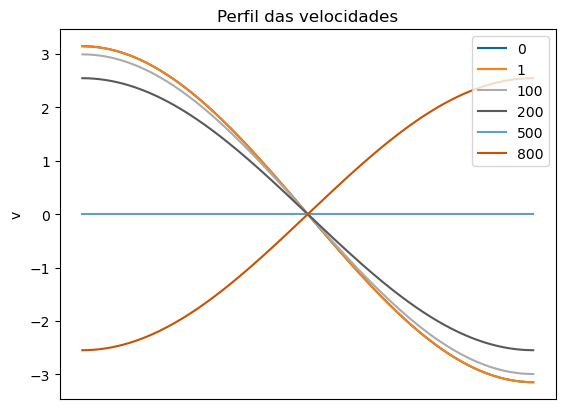

In [44]:
index = [0, 1, 100, 200, 500, 800]

for i in index:
    plt.plot(velocidades[i], label=f'{i}')
    plt.title("Perfil das velocidades")
    plt.ylabel('v')
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.legend(loc='upper right')
